## Chapter 6 - Exercise 1: Trực quan hóa dữ liệu Chipotle

#### Cho dữ liệu 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

Nhà hàng Chipotle cần phân tích dữ liệu bán được trong ngày diễn ra khuyến mãi để có thể điều chỉnh thực đơn và thực hiện các chương trình khuyến mãi phù hợp.

Dữ liệu được cung cấp trong file chipotle.tsv, hãy thực hiện các yêu cầu sau:

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Câu 1: Đọc dữ liệu và gán vào biến chipo 
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'  
chipo = pd.read_csv(url, sep = '\t')
# Hiển thị 10 dòng đầu của dữ liệu
chipo.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

In [3]:
# Câu 2: 
# Tạo biến x chứa các item_name là các món ăn được khách hàng gọi 
x = chipo.item_name
# in head của x
x.head()

0             Chips and Fresh Tomato Salsa
1                                     Izze
2                         Nantucket Nectar
3    Chips and Tomatillo-Green Chili Salsa
4                             Chicken Bowl
Name: item_name, dtype: object

In [4]:
# Tạo một dictionary với 2 thông tin: tên món ăn (item_name) và tần suất/số lần gọi món 
# gợi ý: Sử dụng collections.Counter(x) 
letter_counts = collections.Counter(x)
# in kết quả
letter_counts

Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 1

In [5]:
# Câu 3: Chuyển dictionary câu 2 thành DataFrame df để chuẩn bị cho các yêu cầu phân tích sau đó
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.head()

0
Chips and Fresh Tomato Salsa           110
Izze                                    20
Nantucket Nectar                        27
Chips and Tomatillo-Green Chili Salsa   31
Chicken Bowl                           726

In [6]:
# Câu 4:
# a) Sắp xếp df theo tần suất giảm dần, và lấy 5 item đầu tiên
df_5 = df.sort_values(by = 0, ascending = False)[0:5]
df_5

0
Chicken Bowl         726
Chicken Burrito      553
Chips and Guacamole  479
Steak Burrito        368
Canned Soft Drink    301

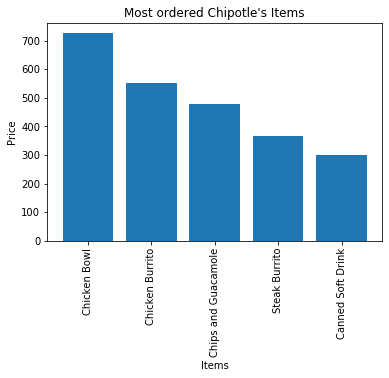

In [7]:
# b) Vẽ biểu đồ bar chart cho biết 5 món được gọi nhiều nhất (có title xlabel, ylabel và xsticks)

# Tạo plot
plt.bar(df_5.index.values, df_5[0].values)

# Thiết lập title và labels, xsticks (rotation='vertical')
plt.xlabel('Items')
plt.ylabel('Price')
plt.title('Most ordered Chipotle\'s Items')
plt.xticks(df_5.index.values, df_5.index.values, rotation='vertical')

# Hiển thị biểu đồ
plt.show()

In [8]:
# Câu 5: 
# a) Đổi kiểu dữ liệu của cột item_price sang kiểu số thực 
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price] 
chipo.head()

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98

In [9]:
# b) Nhóm các đơn hàng theo order_id, và tính tổng số lượng gọi và tổng giá trị của mỗi đơn hàng, 
# in kết quả
orders = chipo.groupby('order_id').sum()
orders.head()

quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70

(0, 36.7178857951459)

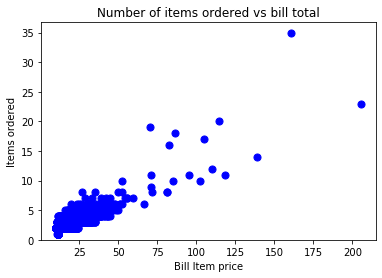

In [10]:
# Câu 6: Từ câu 5b, hãy vẽ scatterplot với x là item_price, và y là quantity, có title, xlabel, ylabel
# Bạn có nhận xét gì qua biểu đồ này 

plt.scatter(x = orders.item_price, y = orders.quantity, s = 50, c = 'blue')

# Thiết lập title và labels
plt.xlabel('Bill Item price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered vs bill total')
plt.ylim(0)